# Naive Bayes Classifier

#### class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.5)

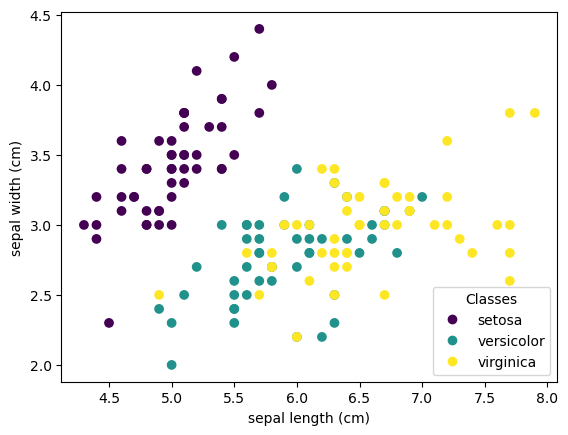

In [3]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [4]:
gnb = GaussianNB()

In [5]:
gnb.fit(X_train, y_train).score(X_test, y_test)

0.9466666666666667

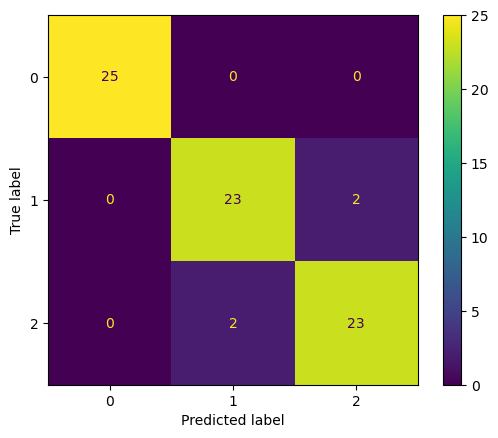

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gnb, X_train, y_train)
plt.show()

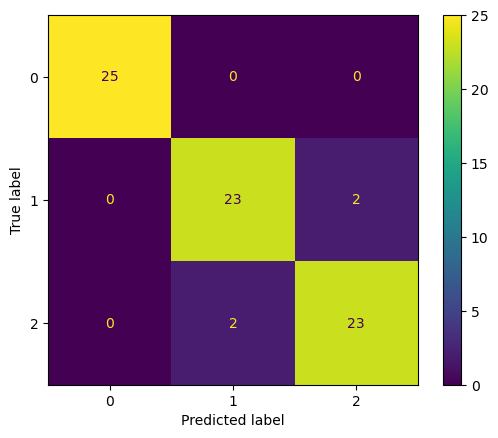

In [7]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.show()

# K-Nearest Neighbors

#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [8]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [9]:
knn.fit(X_train, y_train).score(X_test, y_test)

0.9733333333333334

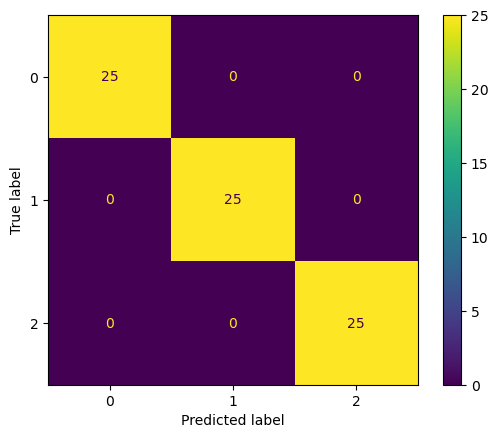

In [10]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)
plt.show()

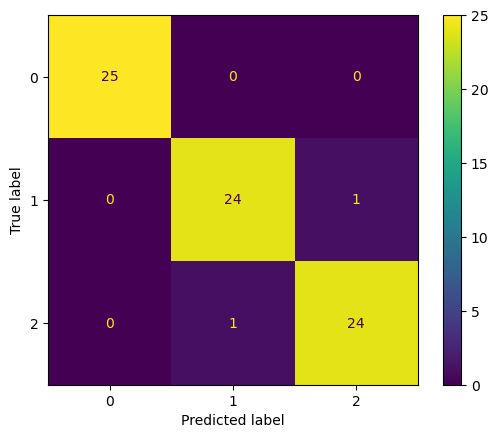

In [11]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [12]:
from sklearn import metrics

k_dict={}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_knn = knn.predict(X_test)
    performance_knn = metrics.accuracy_score(y_test, predictions_knn)
    print("PERFORMANCE", performance_knn, "n_neighbors", i)
    k_dict[i] = round(performance_knn, 4)

PERFORMANCE 0.96 n_neighbors 1
PERFORMANCE 0.9333333333333333 n_neighbors 2
PERFORMANCE 0.9733333333333334 n_neighbors 3
PERFORMANCE 0.9733333333333334 n_neighbors 4
PERFORMANCE 0.96 n_neighbors 5
PERFORMANCE 0.9866666666666667 n_neighbors 6
PERFORMANCE 1.0 n_neighbors 7
PERFORMANCE 0.9733333333333334 n_neighbors 8
PERFORMANCE 0.9866666666666667 n_neighbors 9


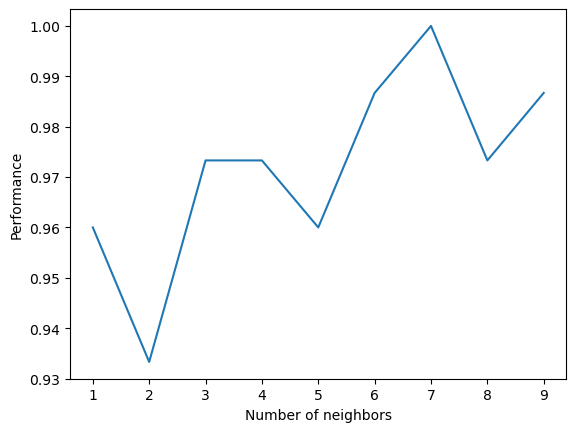

In [13]:
plt.plot(list(k_dict.keys()), list(k_dict.values()))
plt.xlabel('Number of neighbors')
plt.ylabel('Performance')
plt.show()

# Logistic Regression

#### class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.5)
lg.fit(X_train,y_train).score(X_test, y_test)

0.96

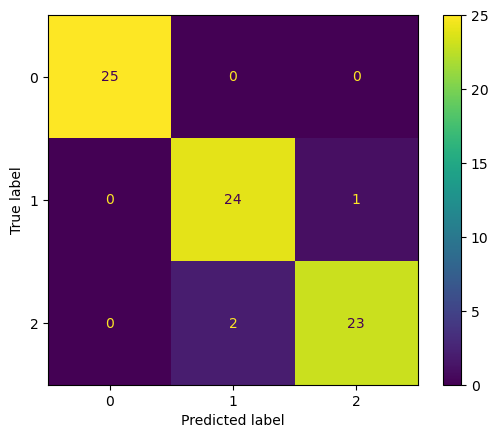

In [15]:
ConfusionMatrixDisplay.from_estimator(lg, X_train, y_train)
plt.show()

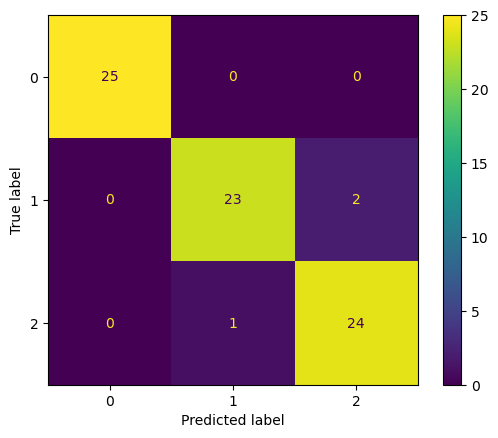

In [16]:
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test)
plt.show()

In [17]:
a=6
k_dict={}
for i in range(1,7):
    lg = LogisticRegression(max_iter=a)
    lg.fit(X_train,y_train)
    predictions_lg = lg.predict(X_test)
    performance_lg = metrics.accuracy_score(y_test, predictions_lg)
    print("PERFORMANCE", performance_lg, "max_iter", a)
    k_dict[a] = round(performance_lg, 4)
    a+=2

PERFORMANCE 0.9333333333333333 max_iter 6
PERFORMANCE 0.9733333333333334 max_iter 8
PERFORMANCE 0.9866666666666667 max_iter 10
PERFORMANCE 0.9733333333333334 max_iter 12
PERFORMANCE 0.9733333333333334 max_iter 14
PERFORMANCE 0.96 max_iter 16


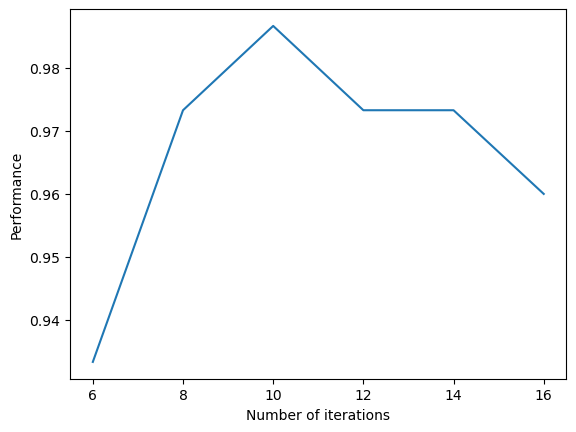

In [18]:
plt.plot(list(k_dict.keys()), list(k_dict.values()))
plt.xlabel('Number of iterations')
plt.ylabel('Performance')
plt.show()

## regularization - reduce risk of overfitting
#### l1 - feature selection when data is high-dimensional

#### l2 - reduce model complexity and overfitting when the dataset has highly correlated features

In [19]:
a=2
k_dict={}
for i in range(1,10):
    lg = LogisticRegression(max_iter=a, penalty ='l1',
                            solver = 'liblinear')
    lg.fit(X_train,y_train)
    predictions_lg = lg.predict(X_test)
    performance_lg = metrics.accuracy_score(y_test, predictions_lg)
    print("PERFORMANCE", performance_lg, "max_iter", a)
    k_dict[a] = round(performance_lg, 4)
    a+=2

PERFORMANCE 0.68 max_iter 2
PERFORMANCE 0.7333333333333333 max_iter 4
PERFORMANCE 0.9066666666666666 max_iter 6
PERFORMANCE 0.8933333333333333 max_iter 8
PERFORMANCE 0.8933333333333333 max_iter 10
PERFORMANCE 0.92 max_iter 12
PERFORMANCE 0.9066666666666666 max_iter 14
PERFORMANCE 0.9066666666666666 max_iter 16
PERFORMANCE 0.9066666666666666 max_iter 18


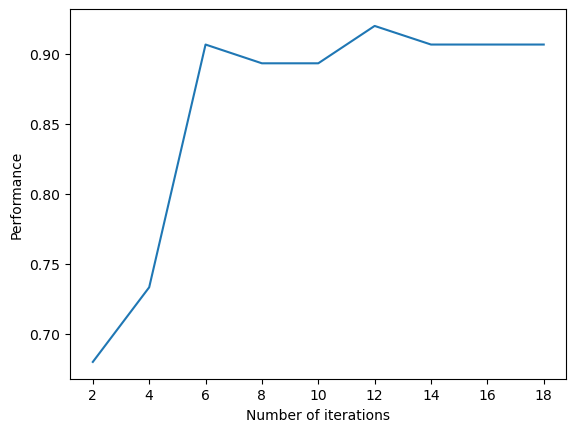

In [20]:
plt.plot(list(k_dict.keys()), list(k_dict.values()))
plt.xlabel('Number of iterations')
plt.ylabel('Performance')
plt.show()

#### elastic net - l1+l2

In [21]:
a=5
k_dict={}
for i in range(1,10):
    lg = LogisticRegression(max_iter=a, penalty ='elasticnet',
                            solver = 'saga', l1_ratio = 0.1 )
    lg.fit(X_train,y_train)
    predictions_lg = lg.predict(X_test)
    performance_lg = metrics.accuracy_score(y_test, predictions_lg)
    print("PERFORMANCE", performance_lg, "max_iter", a)
    k_dict[a] = round(performance_lg, 4)
    a+=5

PERFORMANCE 0.9866666666666667 max_iter 5
PERFORMANCE 0.9733333333333334 max_iter 10
PERFORMANCE 0.9866666666666667 max_iter 15
PERFORMANCE 0.9866666666666667 max_iter 20
PERFORMANCE 0.9866666666666667 max_iter 25
PERFORMANCE 0.9866666666666667 max_iter 30
PERFORMANCE 0.9866666666666667 max_iter 35
PERFORMANCE 0.9866666666666667 max_iter 40
PERFORMANCE 0.9866666666666667 max_iter 45


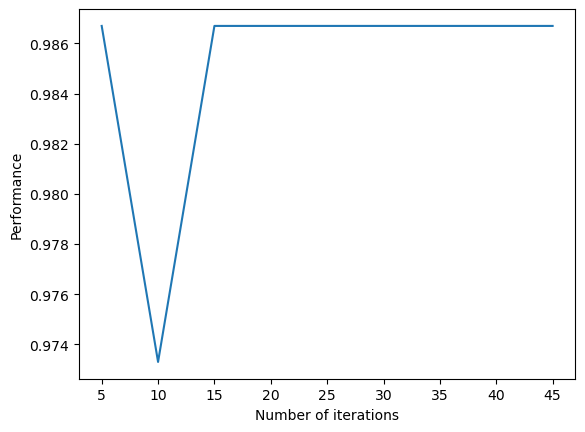

In [22]:
plt.plot(list(k_dict.keys()), list(k_dict.values()))
plt.xlabel('Number of iterations')
plt.ylabel('Performance')
plt.show()

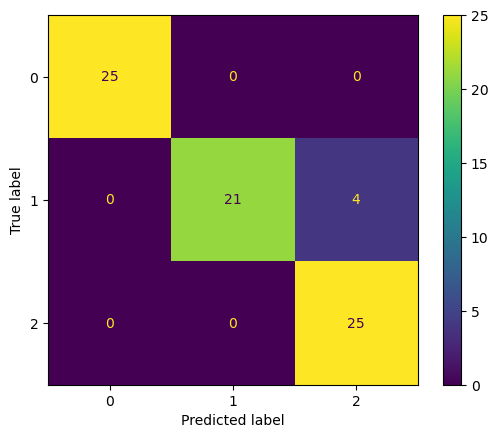

In [23]:
lg = LogisticRegression(max_iter=10, penalty ='elasticnet', solver = 'saga', l1_ratio = 0.1 )
lg.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(lg, X_train, y_train)
plt.show()

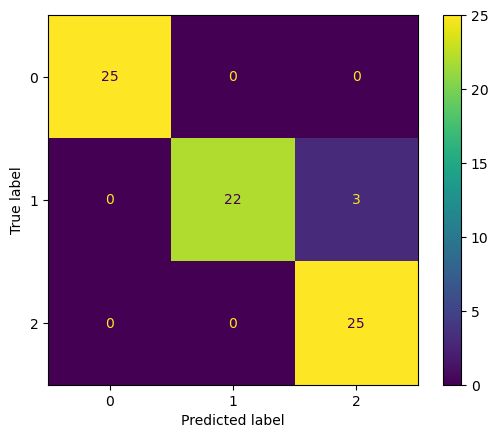

In [24]:
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test)
plt.show()

# Ridge Classifier 

#### class sklearn.linear_model.RidgeClassifier(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, class_weight=None, solver='auto', positive=False, random_state=None)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [26]:
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_estimator_)

RidgeClassifier(alpha=0.9)


In [27]:
model = RidgeClassifier(alpha= 0.9)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(metrics.accuracy_score(y_train_pred,y_train))
print(metrics.accuracy_score(y_test_pred,y_test))

0.8933333333333333
0.8133333333333334


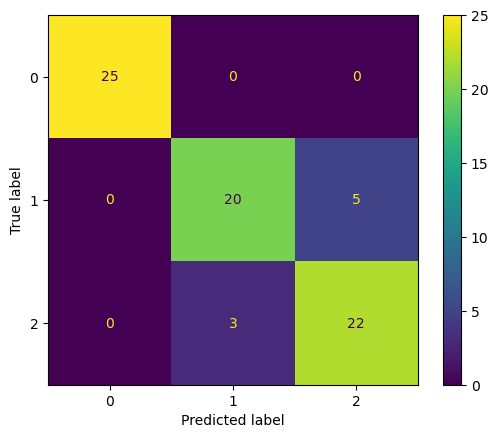

In [28]:
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)
plt.show()

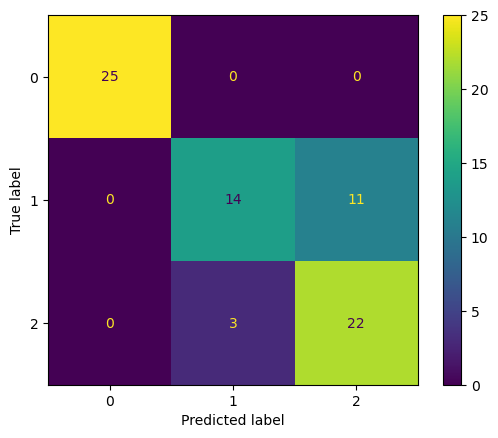

In [29]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Wine dataset

In [30]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)
X=wine.data
y=wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.5)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [31]:
X_train.shape

(89, 13)

In [32]:
y_test.shape

(89,)

In [33]:
print(wine.target_names)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [34]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

#scaling the data to equalise min and max of each feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Support Vector Machine

#### class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [35]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score as accuracy


#separating training and test data
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

In [36]:
#creating the pipeline containing the scaler
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("svc", SVC())])

# define grid
parameters = [{"svc__kernel": ["linear"], "svc__C": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["rbf"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__gamma": [0.01, 0.1, 1, 10, 100]},
              {"svc__kernel": ["poly"], "svc__C": [0.01, 0.1, 1, 10, 100], "svc__degree": np.arange(1,5,1)}]


crossval= StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
clf = GridSearchCV(pipe, param_grid=parameters, cv=crossval, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__gamma': [0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.01, 0.1, 1, 10, 100],
                          'svc__degree': array([1, 2, 3, 4]),
                          'svc__kernel': ['poly']}])

In [37]:
pred_train = clf.best_estimator_.predict(X_train)
pred_test = clf.best_estimator_.predict(X_test)
print(f"Best parameters are: {clf.best_params_}, with a score of {round(clf.best_score_,3)}")
print(f"Accuracy on training set is: {round(accuracy(y_train, pred_train), 3)}")
print(f"Accuracy on test set is : {round(accuracy(y_test, pred_test), 3)}")

Best parameters are: {'svc__C': 0.01, 'svc__degree': 4, 'svc__kernel': 'poly'}, with a score of 0.976
Accuracy on training set is: 1.0
Accuracy on test set is : 0.981


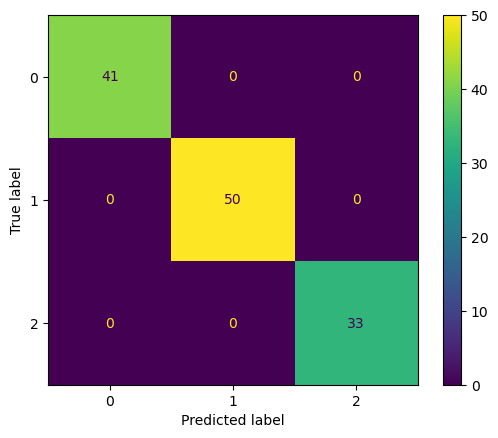

In [38]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
plt.show()

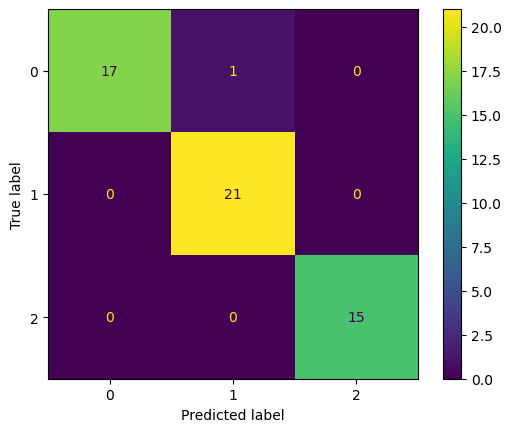

In [39]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# Decision Trees

#### class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [40]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="log_loss", splitter="random")
clf = clf.fit(X_train, y_train)

[Text(0.359375, 0.9375, 'x[11] <= 1.964\nlog_loss = 1.565\nsamples = 124\nvalue = [41, 50, 33]'),
 Text(0.1875, 0.8125, 'x[3] <= 17.774\nlog_loss = 0.345\nsamples = 31\nvalue = [0, 2, 29]'),
 Text(0.125, 0.6875, 'x[3] <= 17.485\nlog_loss = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.0625, 0.5625, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.1875, 0.5625, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.25, 0.6875, 'log_loss = 0.0\nsamples = 28\nvalue = [0, 0, 28]'),
 Text(0.53125, 0.8125, 'x[12] <= 1039.974\nlog_loss = 1.209\nsamples = 93\nvalue = [41, 48, 4]'),
 Text(0.46875, 0.6875, 'x[9] <= 3.798\nlog_loss = 1.014\nsamples = 64\nvalue = [12, 48, 4]'),
 Text(0.3125, 0.5625, 'x[2] <= 3.094\nlog_loss = 0.165\nsamples = 41\nvalue = [1, 40, 0]'),
 Text(0.25, 0.4375, 'log_loss = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.375, 0.4375, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.625, 0.5625, 'x[11] <= 2.191\nlog_loss = 1.478\nsamples = 23\nv

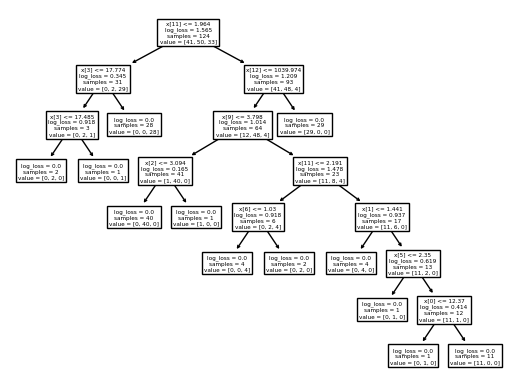

In [41]:
tree.plot_tree(clf)

In [42]:
score = clf.score(X_test, y_test)
score

0.8888888888888888

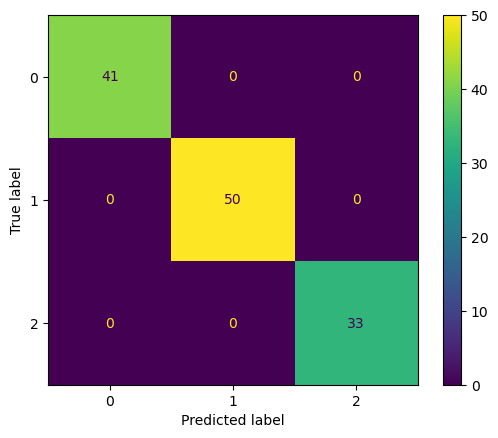

In [43]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
plt.show()

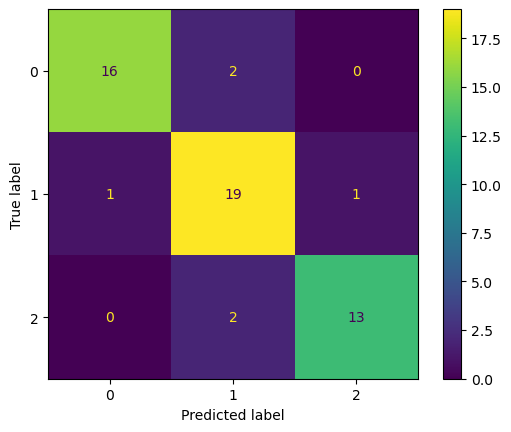

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [45]:
# wine = load_wine()
# X=wine.data
# y=wine.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.5)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# score = clf.score(X_test, y_test)
# score
# score = 0.8651685393258427
# scores can differ, but this one in most cases should be worse than on scaled data

## Pruning

#### prepruning

In [46]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [47]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {metrics.accuracy_score(y_train_pred,y_train)}')
print(f'Test score {metrics.accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.9074074074074074


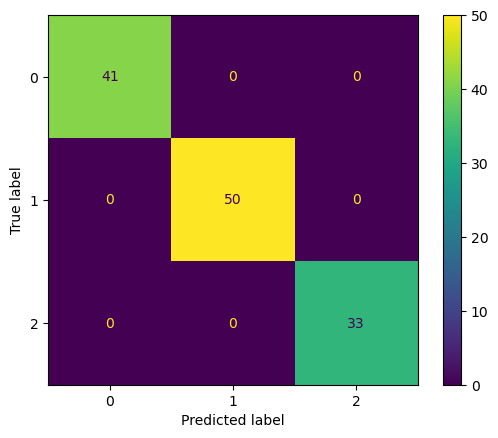

In [48]:
ConfusionMatrixDisplay.from_estimator(model, X_train,y_train)
plt.show()

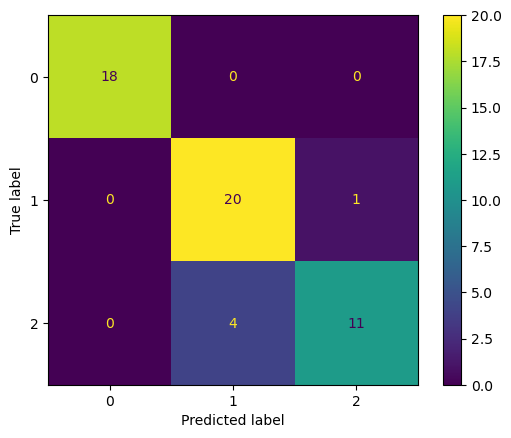

In [49]:
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)
plt.show()

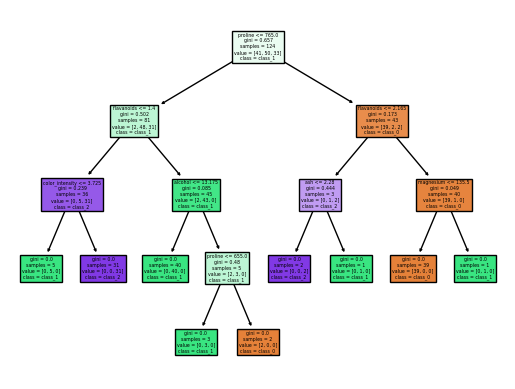

In [50]:
tree.plot_tree(model,feature_names=wine.feature_names,class_names=list(wine.target_names),filled=True)
plt.show()

#### post pruning with cost complexity pruning

In [51]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.01075269 0.01541219 0.01572581 0.03353651 0.06944444
 0.22748905 0.2694852 ]


In [52]:
# For each alpha append model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

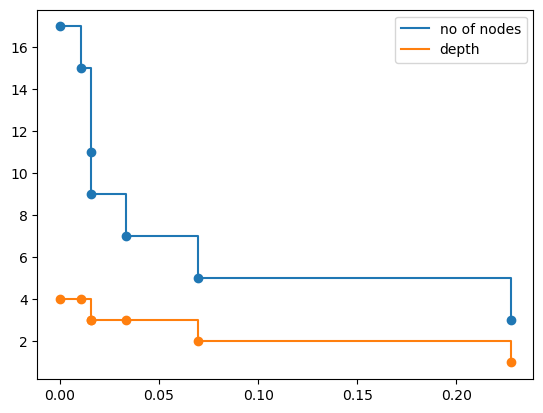

In [53]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()
# As alpha increases no of nodes and depth decreases

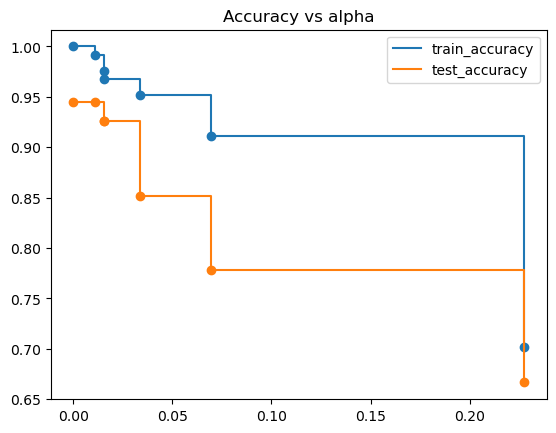

In [54]:
# As alpha increases no of nodes and depth decreases

train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train_pred,y_train))
    test_acc.append(metrics.accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [55]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {metrics.accuracy_score(y_train_pred,y_train)}')
print(f'Test score {metrics.accuracy_score(y_test_pred,y_test)}')

Train score 0.967741935483871
Test score 0.9259259259259259


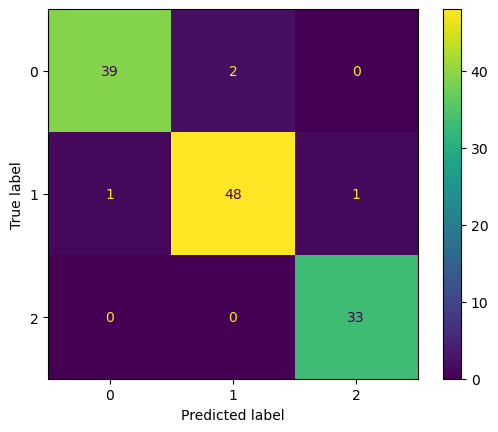

In [56]:
ConfusionMatrixDisplay.from_estimator(clf_, X_train,y_train)
plt.show()

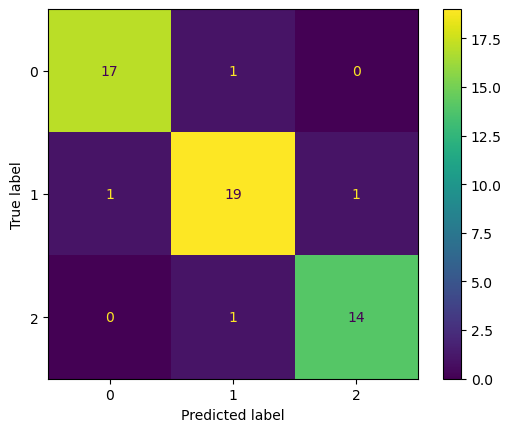

In [57]:
ConfusionMatrixDisplay.from_estimator(clf_, X_test,y_test)
plt.show()

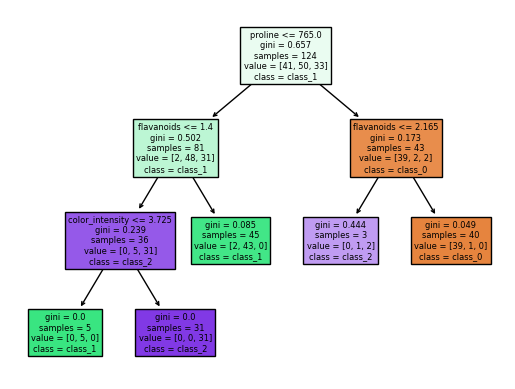

In [58]:
tree.plot_tree(clf_,feature_names=wine.feature_names,class_names=list(wine.target_names),filled=True)
plt.show()

#### complexity of tree is reduced

# Stochastic Gradient Descent

#### class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [59]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log_loss", max_iter=100)
clf = clf.fit(X_train, y_train)


In [60]:
score = clf.score(X_test, y_test)
score

0.6666666666666666

In [61]:
#grid search
params={
    'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', None],
    'alpha':[0.0001,0.001,0.01,0.1,0.5],
    'max_iter': [2000, 3000, 5000, 10000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1, 10],
    'validation_fraction': [0.1, 0.3, 0.5],
}

In [62]:
clf = SGDClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params, cv = 5, n_jobs = -1)
gcv.fit(X_train,y_train)

/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
                         'eta0': [0.01, 0.1, 1, 10],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', None],
                         'max_iter': [2000, 3000, 5000, 10000],
                         'validation_fraction': [0.1, 0.3, 0.5]})

In [63]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {metrics.accuracy_score(y_train_pred,y_train)}')
print(f'Test score {metrics.accuracy_score(y_test_pred,y_test)}')

Train score 0.7258064516129032
Test score 0.7037037037037037


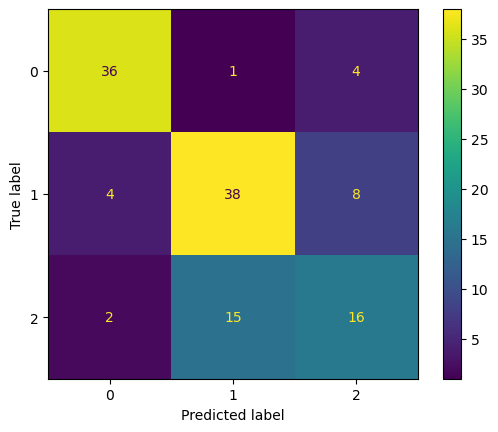

In [64]:
ConfusionMatrixDisplay.from_estimator(model, X_train,y_train)
plt.show()

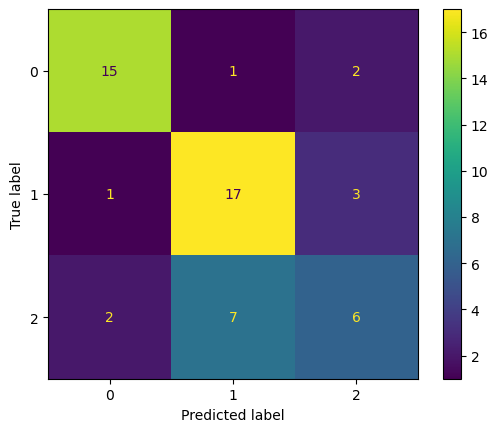

In [65]:
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)
plt.show()

In [66]:
# another approach
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#### StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.

In [67]:
# Pipeline with scaling features
model = make_pipeline(StandardScaler(), SGDClassifier())

# parameter grid
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__max_iter': [1000, 2000, 3000],
    'sgdclassifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cass/anaconda3/lib/python3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge'],
                         'sgdclassifier__max_iter': [1000, 2000, 3000]},
             scoring='accuracy')

In [68]:
# evaluate Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters found by grid search:", grid_search.best_params_)
print("Accuracy of the best model on the test set:", accuracy)

Best parameters found by grid search: {'sgdclassifier__alpha': 0.1, 'sgdclassifier__loss': 'modified_huber', 'sgdclassifier__max_iter': 2000}
Accuracy of the best model on the test set: 1.0


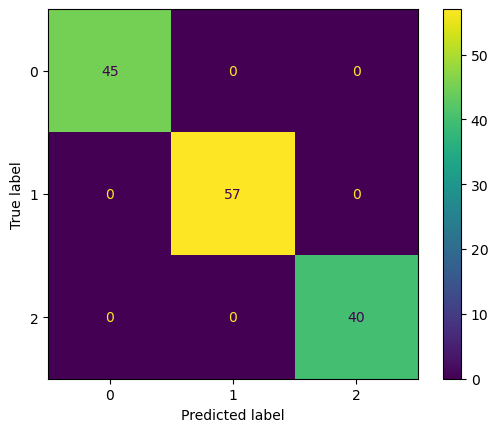

In [69]:
ConfusionMatrixDisplay.from_estimator(best_model, X_train,y_train)
plt.show()

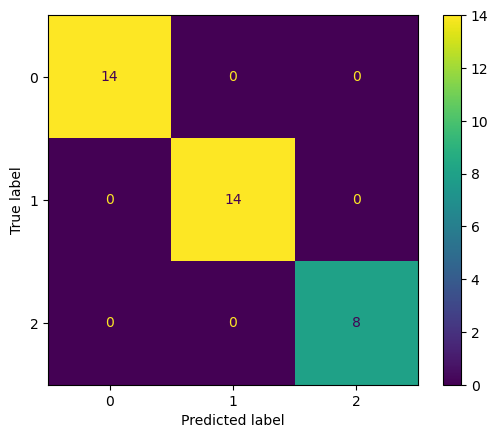

In [70]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test,y_test)
plt.show()